In [1]:
import csv

In [44]:
f= open('C:\python/basket_data.csv','r')
r = csv.reader(f)

dataset=[[] for i in range(5)]
idx=0
for line in r:
    for row in line:
        if len(row)!=0:
            dataset[idx].append(row)
    idx+=1
print(dataset)
f.close()

[['soju', 'cola', 'wine', 'grape juice'], ['soju', 'orange Juice', 'cola', 'apple juice'], ['cola', 'beer', 'wine', 'apple juice', 'grape juice'], ['soju', 'cola', 'beer', 'apple juice'], ['orange juice', 'wine', 'grape juice']]


In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

- support
  - 전체 거래에서 특정 물품 A와 B가 동시에 거래되는 비중.
  - 해당 규칙이 얼마나 의미있는지 보여줌.
- confidence
  - A를 포함하는 거래 중 A와 B가 동시에 거래되는 비중
- lift
  - A라는 상품에서 신뢰도가 동일한 상품 B와 C가 존재할 때, 어떤 상품을 더 추천해야 좋을지 판단.
  - A와 B가 동시에 거래된 비중을 A와 B가 서로 독립된 사건일 때 동시에 거래된 비중으로 나눈 값









In [22]:
# n번째에 X가 있으면 True, 아니면 False
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary,columns=oht.columns_)
print(df)

   apple juice   beer   cola  grape juice  orange Juice  orange juice   soju  \
0        False  False   True         True         False         False   True   
1         True  False   True        False          True         False   True   
2         True   True   True         True         False         False  False   
3         True   True   True        False         False         False   True   
4        False  False  False         True         False          True  False   

    wine  
0   True  
1  False  
2   True  
3  False  
4   True  


In [23]:
# min_support = 0.6
# eggs를 살 확률은 0.8, eggs,onion을 같이 살 확률은 0.6
frequent_itemsets=apriori(df,min_support=0.6,use_colnames=True)
print(frequent_itemsets)

   support             itemsets
0      0.6        (apple juice)
1      0.8               (cola)
2      0.6        (grape juice)
3      0.6               (soju)
4      0.6               (wine)
5      0.6  (cola, apple juice)
6      0.6         (cola, soju)
7      0.6  (wine, grape juice)


In [24]:
# confidence 0.7 이상
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
# 그 중에서 lift 1.2이상
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.2)
print(rules)

     antecedents    consequents  antecedent support  consequent support  \
0         (cola)  (apple juice)                 0.8                 0.6   
1  (apple juice)         (cola)                 0.6                 0.8   
2         (cola)         (soju)                 0.8                 0.6   
3         (soju)         (cola)                 0.6                 0.8   
4         (wine)  (grape juice)                 0.6                 0.6   
5  (grape juice)         (wine)                 0.6                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.6        0.75  1.250000      0.12         1.6  
1      0.6        1.00  1.250000      0.12         inf  
2      0.6        0.75  1.250000      0.12         1.6  
3      0.6        1.00  1.250000      0.12         inf  
4      0.6        1.00  1.666667      0.24         inf  
5      0.6        1.00  1.666667      0.24         inf  


In [25]:
support=list(rules['support'].values)
confidence=list(rules['confidence'].values)

In [26]:
import random
import matplotlib.pyplot as plt

여기는 왜 해주는지 모르겠다

In [27]:
for i in range(len(support)):
    support[i]=support[i]+0.0025*(random.randint(1,10)-5)
    confidence[i]=confidence[i]+0.0025*(random.randint(1,10)-5)

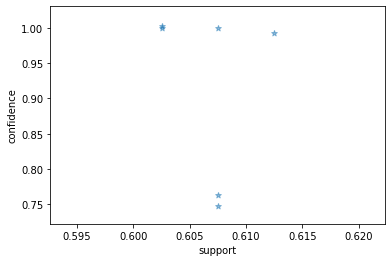

In [28]:
plt.scatter(support,confidence,alpha=0.5,marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [29]:
import numpy as np

In [30]:
def draw_graph(rules,rules_to_show):
    import networkx as nx
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11']
    
    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a,"R"+str(i),color=colors[i],weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i),c,color=colors[i],weight=2)
            
    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
            
    edges=G1.edges()
    colors=[G1[u][v]['color'] for u,v in edges]
    weights=[G1[u][v]['weight'] for u,v in edges]
    
    pos=nx.spring_layout(G1,k=16,scale=1)
    nx.draw(G1, pos, edges=edges, node_color=color_map, edge_color=colors, 
       width=weights, font_size=16, with_labels=False)
    
    for p in pos: # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1,pos)
    plt.show()

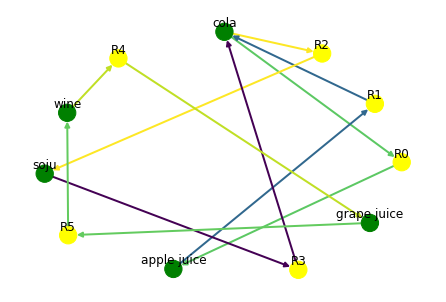

In [37]:
draw_graph(rules,6)